In [32]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

from tqdm import tqdm
from matplotlib import pyplot as plt

from models.models import MLP
from flow_matching.models import DiffusionFM, COTFM
from utils.datasets import get_data, create_dataloader
from flow_matching.samplers import Sampler2D

In [35]:
device = "cuda:1" if torch.cuda.is_available() else "cpu"
torch.device(device)

device(type='cuda', index=1)

# Checkerboard dataset

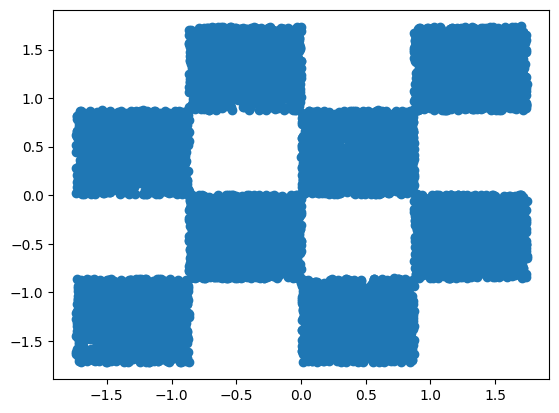

In [36]:
n_points = 10_000
DATASET = "checkers"
data = get_data(DATASET, n_points)

%matplotlib inline
plt.scatter(data[:, 0], data[:, 1])
plt.show()

batch_size = 2064
dataloader = create_dataloader(data, batch_size=batch_size)

In [37]:

model_diff=MLP(h=512).to(device)
fm = DiffusionFM() 
sigma_min = 0
optimizer=torch.optim.Adam(model_diff.parameters())
n_epochs=5000

for _ in tqdm(range(n_epochs)):  
    for batch in dataloader:
        x_1 = batch[0].to(device)
        
        loss = fm.loss(model_diff, x_1)
        
        optimizer.zero_grad()    
        loss.backward()    
        optimizer.step()     

100%|██████████| 5000/5000 [03:50<00:00, 21.70it/s]


In [39]:
model_ot=MLP(h=512).to(device)
fm = COTFM() 
sigma_min = 0
optimizer=torch.optim.Adam(model_ot.parameters())
n_epochs=5000

for _ in tqdm(range(n_epochs)):  
    for batch in dataloader:
        x_1 = batch[0].to(device)
        
        loss = fm.loss(model_ot, x_1)
        
        optimizer.zero_grad()    
        loss.backward()    
        optimizer.step()     

100%|██████████| 5000/5000 [03:37<00:00, 23.04it/s]


In [40]:
x_0 = torch.randn((10000,2), device=device)
sampler_ot = Sampler2D(model_ot, x_0, time_steps=10, fm_method="default", device=device)
sampler_diff = Sampler2D(model_diff, x_0, time_steps=10, fm_method="diffusion", device=device)

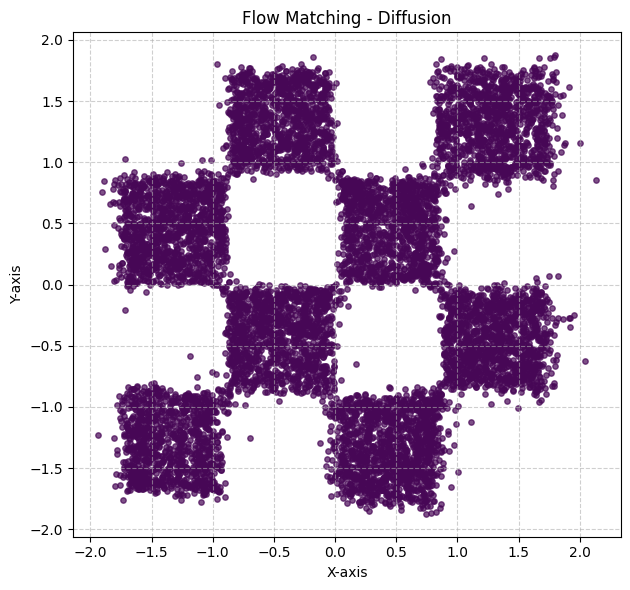

In [137]:
sampler_diff.plot_sample(title="Flow Matching - Diffusion", figsize=(8, 6), point_size=15, alpha=0.7)

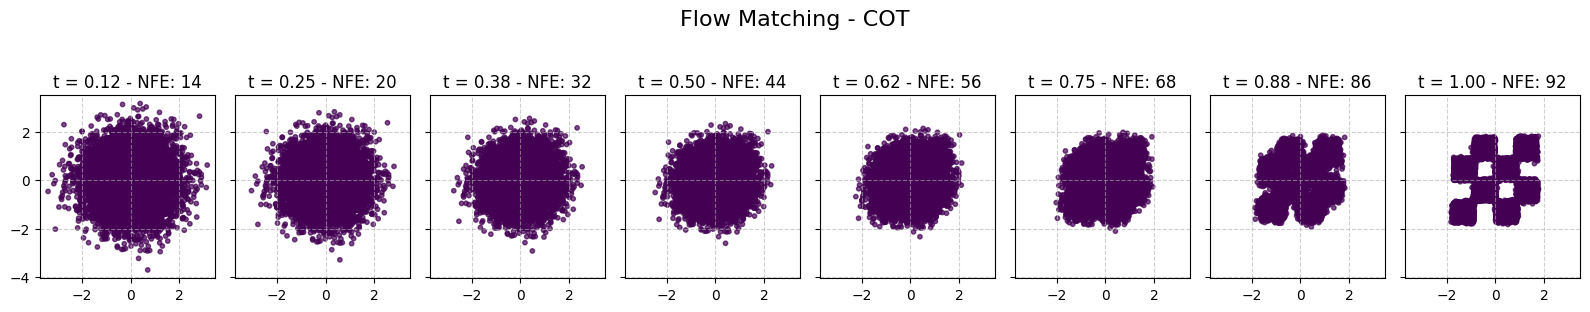

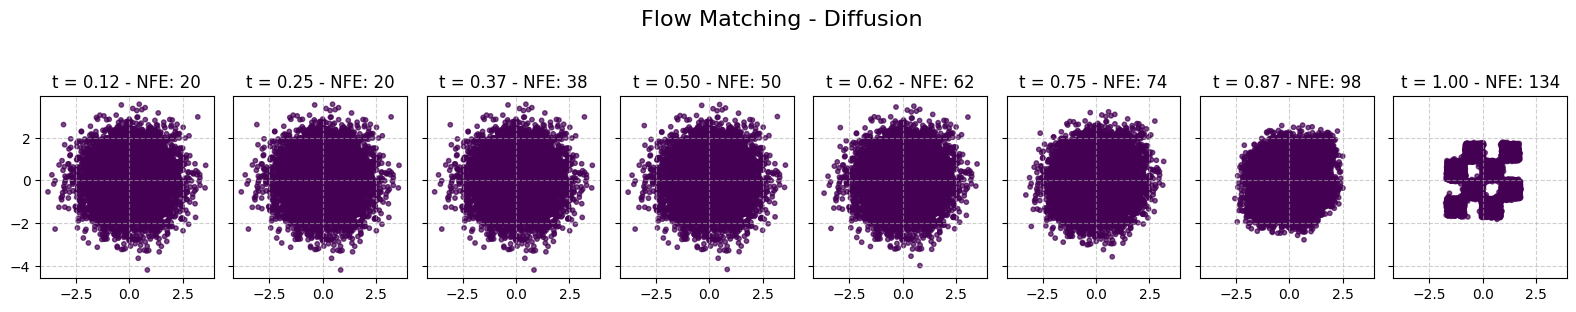

In [55]:
sampler_ot.plot_flow(9, plot_nfe=True, title="Flow Matching - COT")
sampler_diff.plot_flow(9, plot_nfe=True, title="Flow Matching - Diffusion")  

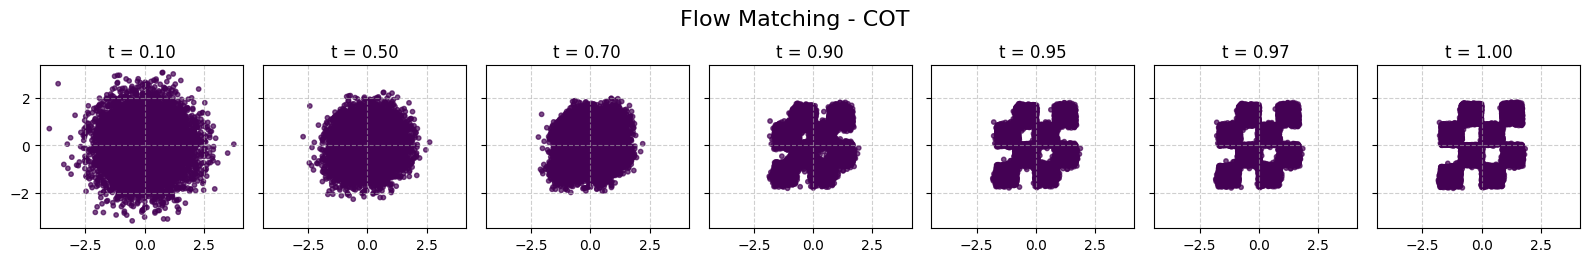

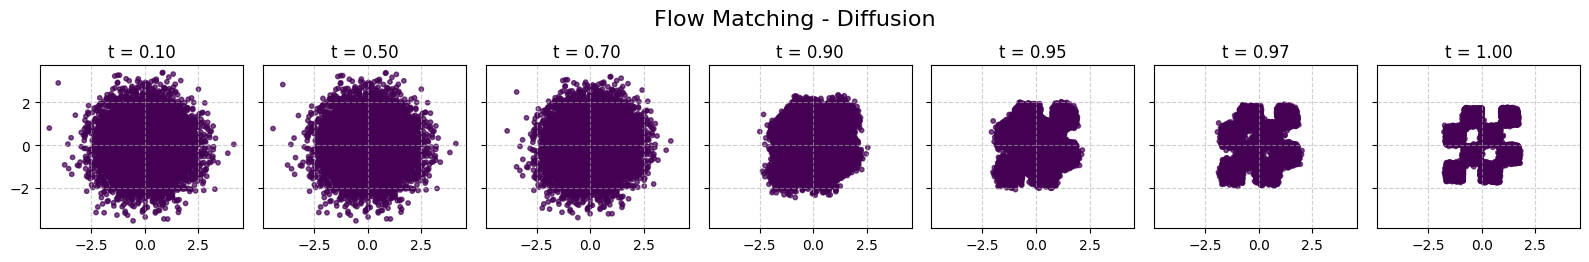

In [24]:
sampler_ot.plot_flow_time_targets([0.1, 0.5, 0.7, 0.9, 0.95, 0.97, 1], title="Flow Matching - COT", title_y=0.65)
sampler_diff.plot_flow_time_targets([0.1, 0.5, 0.7, 0.9, 0.95, 0.97, 1-1e-5], title="Flow Matching - Diffusion", title_y=0.65)

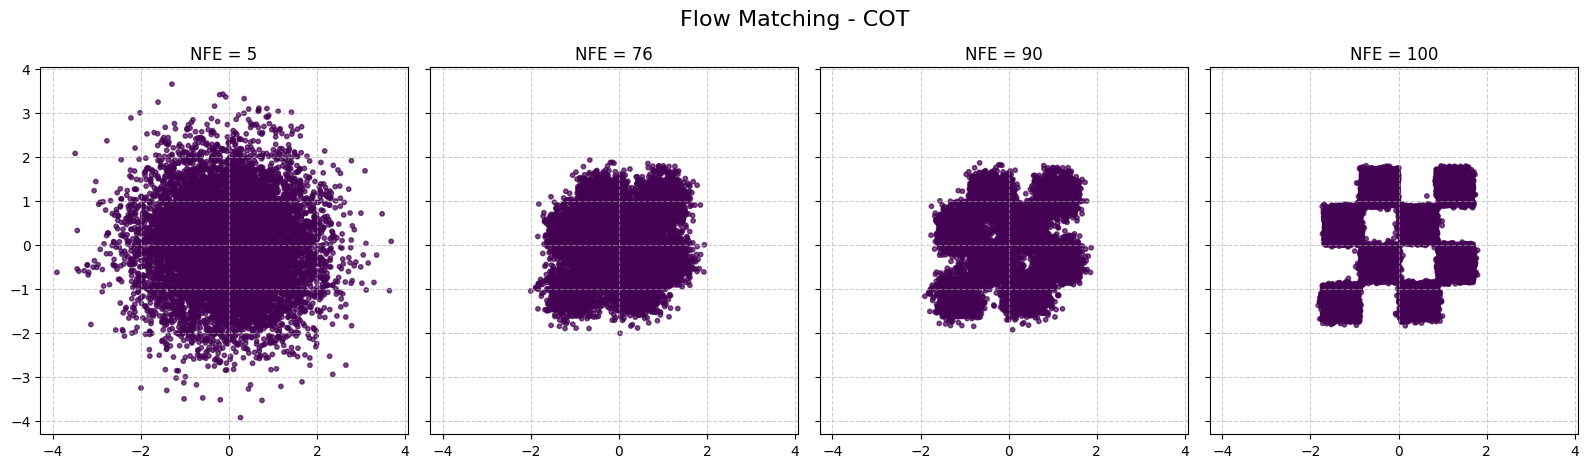

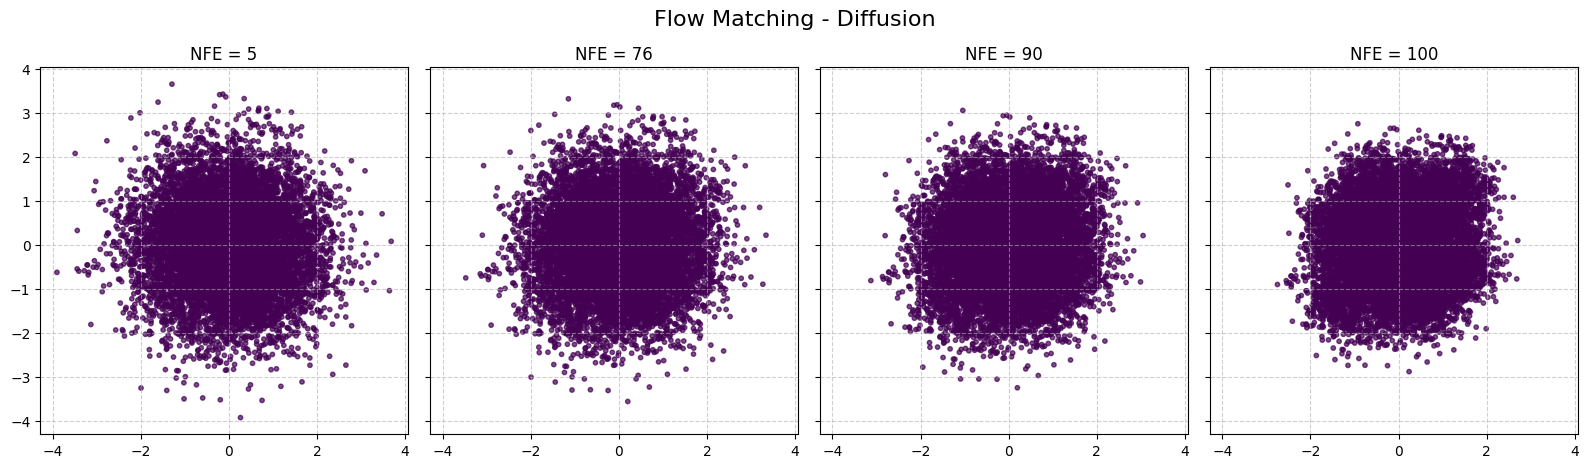

In [57]:
nfe_targets = [5, 76, 90, 100]
sampler_ot.plot_flow_nfe_targets(nfe_targets, title="Flow Matching - COT", title_y="0.78")
sampler_diff.plot_flow_nfe_targets(nfe_targets, title="Flow Matching - Diffusion", title_y="0.78")

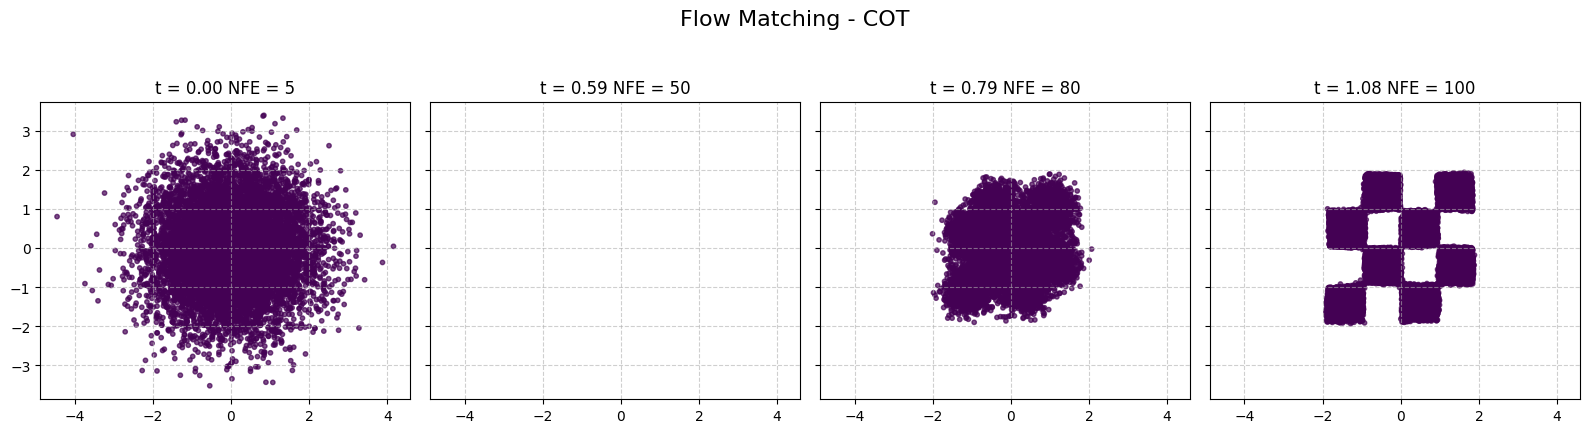

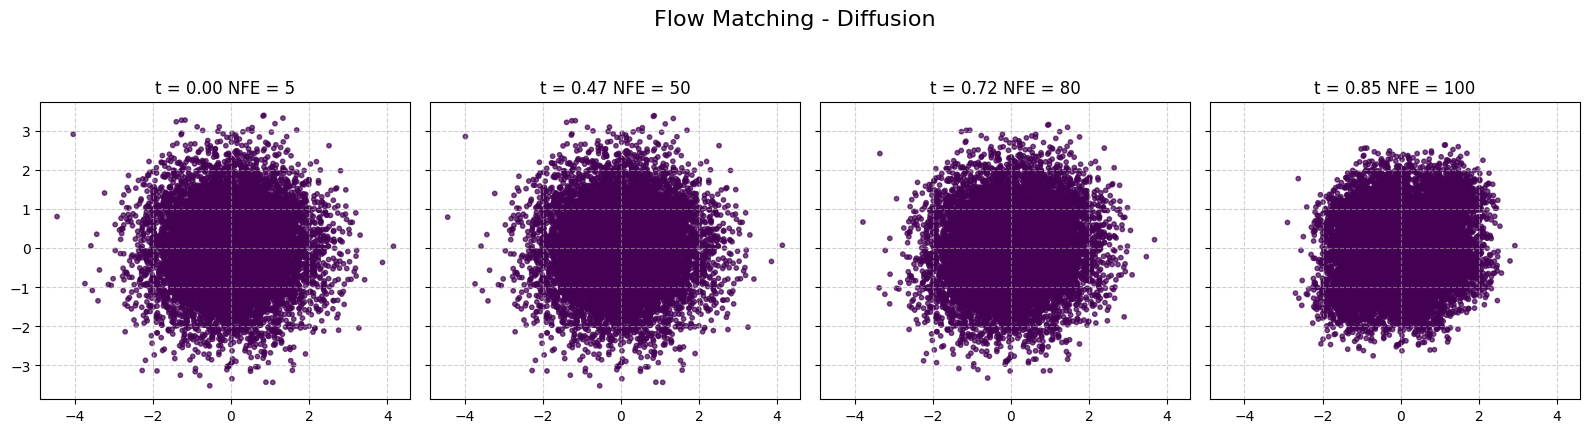

In [30]:
nfe_targets = [5, 50, 80, 100]
sampler_ot.plot_flow_nfe_targets(nfe_targets, title="Flow Matching - COT", title_y="0.78")
sampler_diff.plot_flow_nfe_targets(nfe_targets, title="Flow Matching - Diffusion", title_y="0.78")

# make_moons dataset

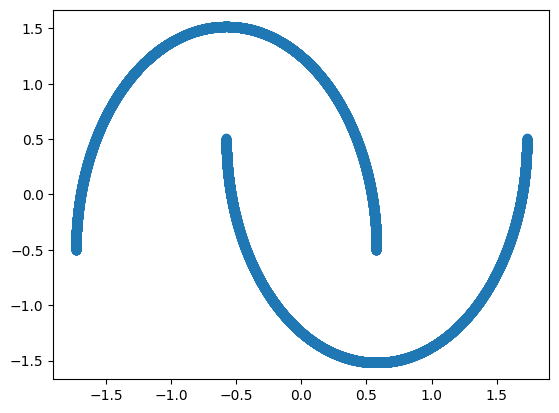

In [58]:
n_points = 10_000
DATASET = "moons"
data = get_data(DATASET, n_points)

%matplotlib inline
plt.scatter(data[:, 0], data[:, 1])
plt.show()

batch_size = 2064
dataloader = create_dataloader(data, batch_size=batch_size)

In [59]:
model_ot_2=MLP(h=512).to(device)
fm = COTFM() 
sigma_min = 0
optimizer=torch.optim.Adam(model_ot_2.parameters())
n_epochs=5000

for _ in tqdm(range(n_epochs)):  
    for batch in dataloader:
        x_1 = batch[0].to(device)
        
        loss = fm.loss(model_ot_2, x_1)
        
        optimizer.zero_grad()    
        loss.backward()    
        optimizer.step()     

100%|██████████| 5000/5000 [03:41<00:00, 22.58it/s]


In [60]:
model_diff_2=MLP(h=512).to(device)
fm = COTFM() 
sigma_min = 0
optimizer=torch.optim.Adam(model_diff_2.parameters())
n_epochs=5000

for _ in tqdm(range(n_epochs)):  
    for batch in dataloader:
        x_1 = batch[0].to(device)
        
        loss = fm.loss(model_diff_2, x_1)
        
        optimizer.zero_grad()    
        loss.backward()    
        optimizer.step()     

100%|██████████| 5000/5000 [03:39<00:00, 22.74it/s]


In [63]:
x_0 = torch.randn((10000,2), device=device)
sampler_ot_2 = Sampler2D(model_ot_2, x_0, time_steps=10, fm_method="default", device=device)
sampler_diff_2 = Sampler2D(model_diff_2, x_0, time_steps=10, fm_method="diffusion", device=device)

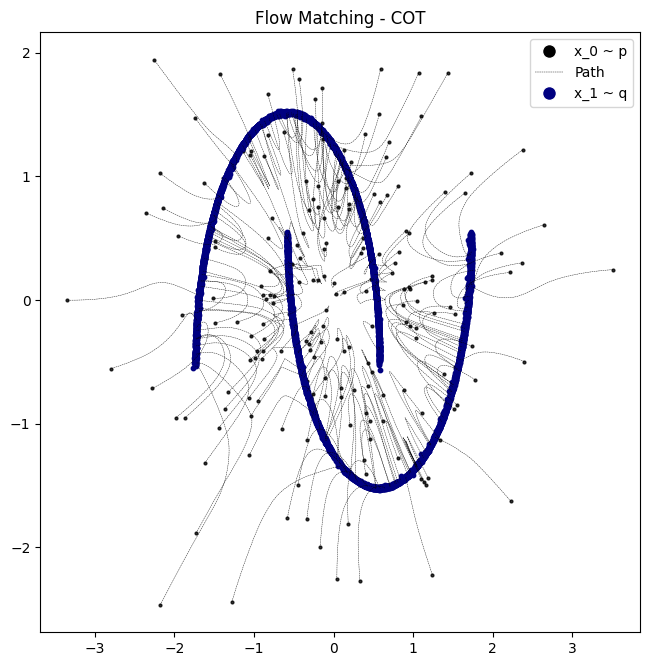

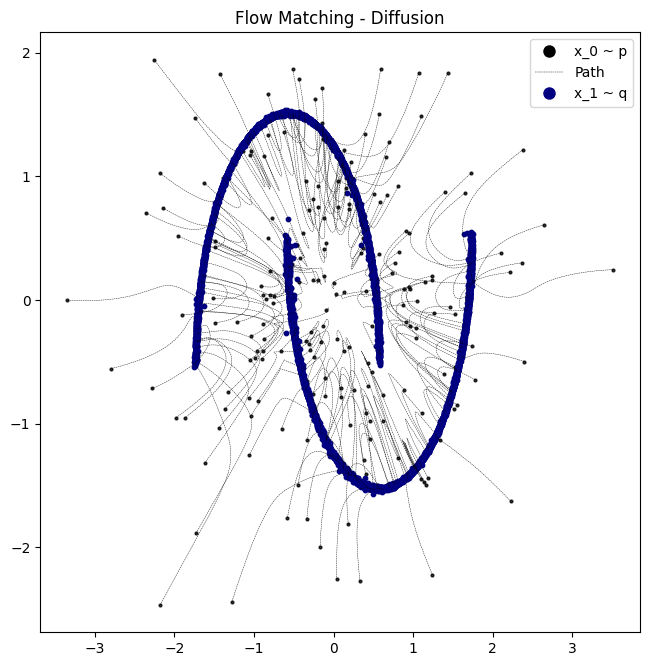

In [64]:
sampler_ot_2.plot_trajectories(n=200, title="Flow Matching - COT")
sampler_diff_2.plot_trajectories(n=200, title="Flow Matching - Diffusion")

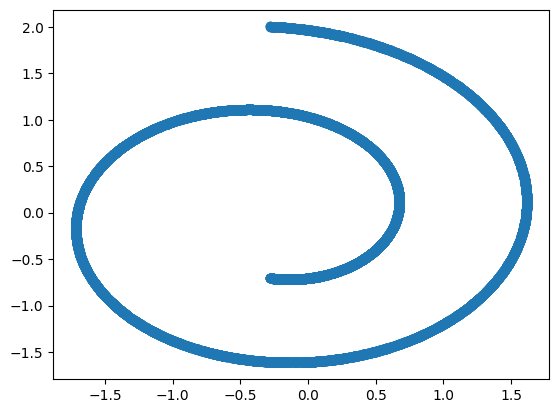

In [65]:
n_points = 10_000
DATASET = "swiss"
data = get_data(DATASET, n_points)

%matplotlib inline
plt.scatter(data[:, 0], data[:, 1])
plt.show()

batch_size = 2064
dataloader = create_dataloader(data, batch_size=batch_size)

# make_swiss_roll dataset

In [66]:
model_ot_3=MLP(h=512).to(device)
fm = COTFM() 
sigma_min = 0
optimizer=torch.optim.Adam(model_ot_3.parameters())
n_epochs=5000

for _ in tqdm(range(n_epochs)):  
    for batch in dataloader:
        x_1 = batch[0].to(device)
        
        loss = fm.loss(model_ot_3, x_1)
        
        optimizer.zero_grad()    
        loss.backward()    
        optimizer.step()     

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [03:45<00:00, 22.22it/s]


In [188]:
model_diff_3=MLP(h=512).to(device)
fm = COTFM() 
sigma_min = 0
optimizer=torch.optim.Adam(model_diff_3.parameters())
n_epochs=5000

for _ in tqdm(range(n_epochs)):  
    for batch in dataloader:
        x_1 = batch[0].to(device)
        
        loss = fm.loss(model_diff_3, x_1)
        
        optimizer.zero_grad()    
        loss.backward()    
        optimizer.step()     

100%|██████████| 5000/5000 [03:45<00:00, 22.15it/s]


In [69]:
x_0 = torch.randn((10000,2), device=device)
sampler_ot_3 = Sampler2D(model_ot_3, x_0, time_steps=10, fm_method="default", device=device)
sampler_diff_3 = Sampler2D(model_diff_3, x_0, time_steps=10, fm_method="diffusion", device=device)

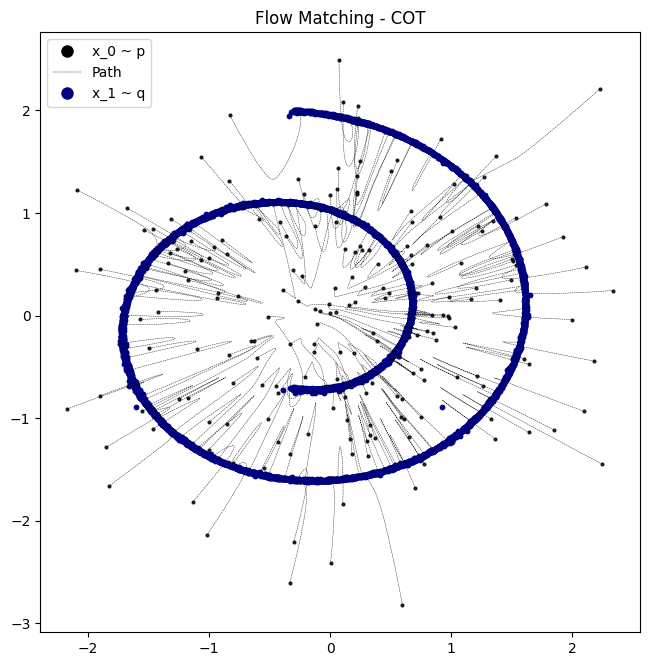

In [70]:
sampler_ot_3.plot_trajectories(n=200, title="Flow Matching - COT")
sampler_diff_3.plot_trajectories(n=200, title="Flow Matching - Diffusion")

# MNIST dataset

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])


train_dataset = datasets.MNIST(root='./data_mnist', train=True, download=True, transform=transform)

dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=512, shuffle=True)

In [6]:
from models.models import UNet
from flow_matching.samplers import visualize_mnist_flow

model_ot = UNet(in_channels=1).to(device)
fm = DiffusionFM(minist=True) 
sigma_min = 0
optimizer=torch.optim.Adam(model_ot.parameters())
n_epochs=50

for _ in tqdm(range(n_epochs)):  
    for batch in dataloader:
        x_1 = batch[0].to(device)
        
        loss = fm.loss(model_ot, x_1)
        
        optimizer.zero_grad()    
        loss.backward()    
        optimizer.step()   

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [12:34<00:00, 15.10s/it]


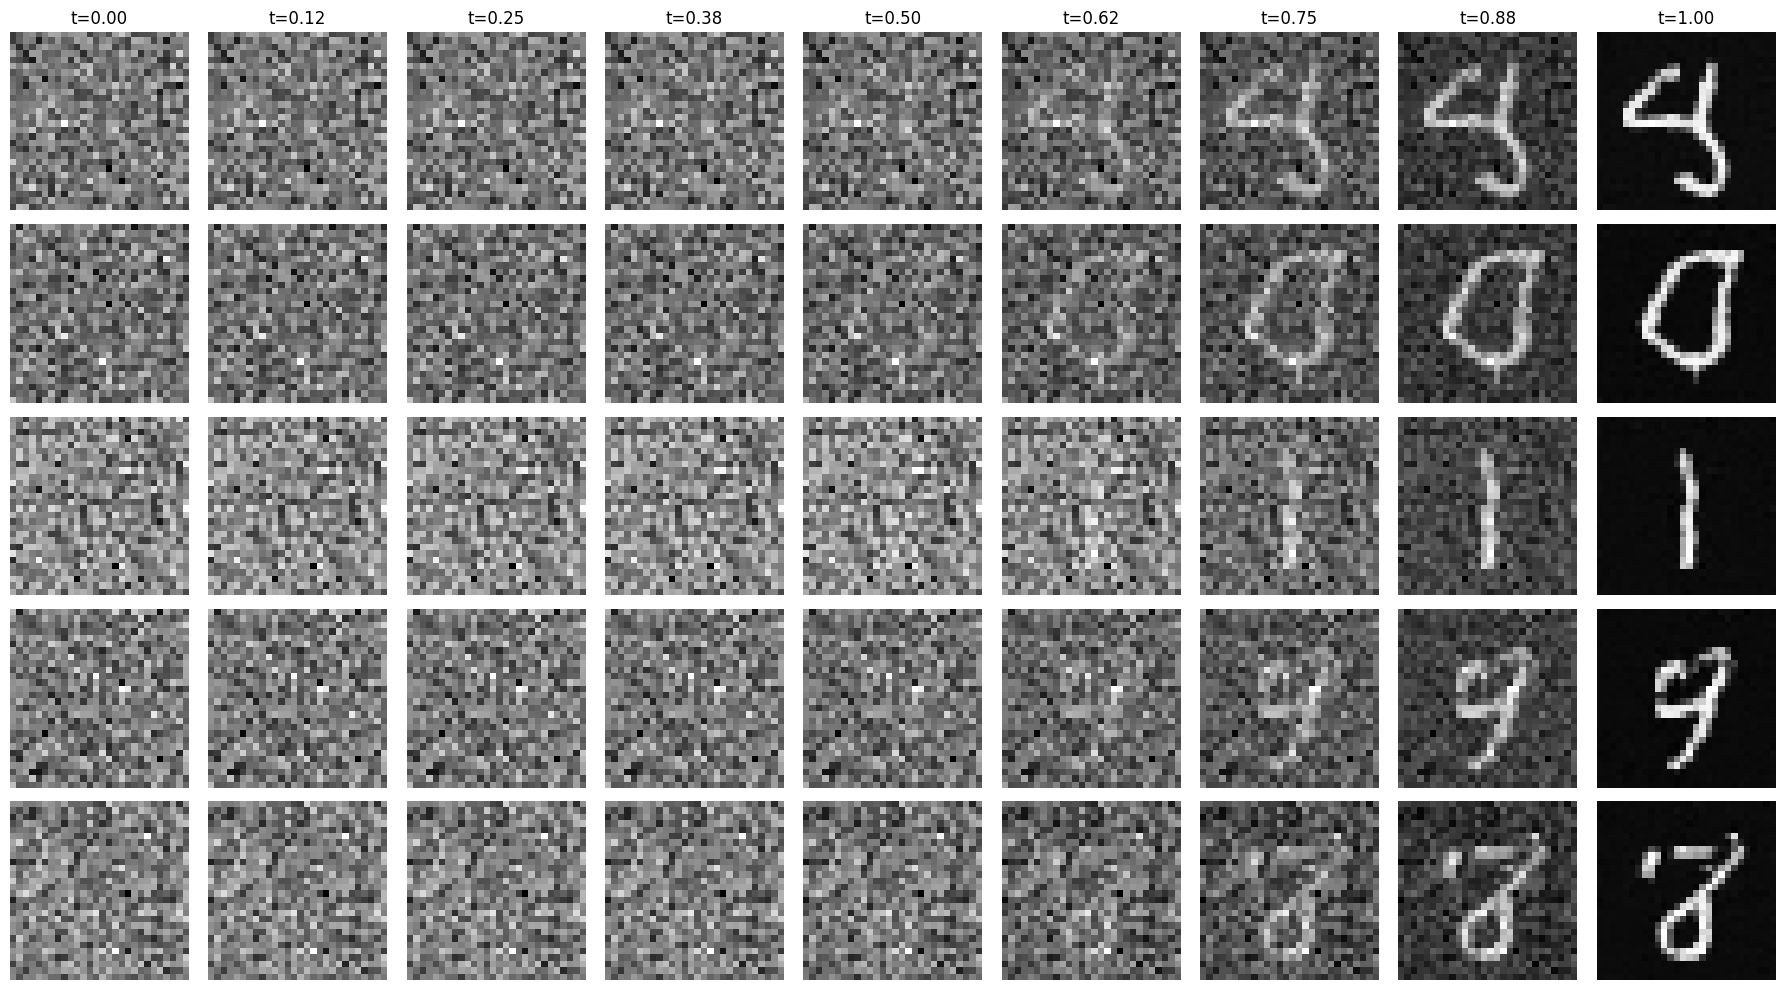

In [31]:
visualize_mnist_flow(model_ot, n_samples=5, n_steps=8, device=device)